<a href="https://colab.research.google.com/github/gandalfmuda/Data-Scientis-mastery/blob/main/Animasi%20Grafik%20Down%20Covid19/Animasi_Grafik_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'#BUMN #Kemenkes #DataRiset #BRIN'


Disini saya membuat contoh data analisis kasus covid19 yang menurun angka kasus nya pada bulan Januari 2023.

Data ini di buat grafik animasi sesuai penurunan kasus dan tanggal nya.

In [ ]:
pip install pandas matplotlib

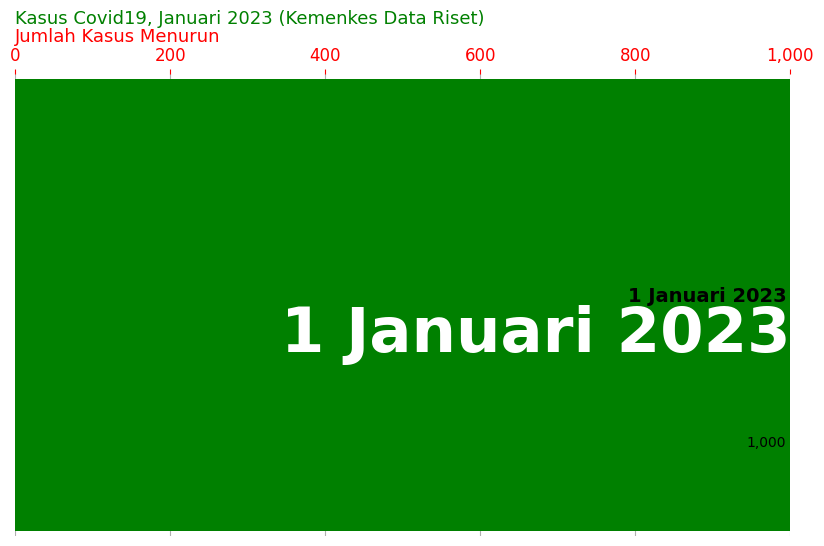

In [35]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Contoh data angka COVID-19 di Indonesia yang menurun di tahun 2023
data = {
    'Tanggal': ['1 Januari 2023', '2 Januari 2023', '3 Januari 2023', '4 Januari 2023', '5 Januari 2023'],
    'Jumlah Kasus': [1000, 900, 800, 700, 600]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

def draw_barchart(date):
    ax.clear()
    df_temp = df[df['Tanggal'].eq(date)].sort_values(by='Jumlah Kasus', ascending=True)
    ax.barh(df_temp['Tanggal'], df_temp['Jumlah Kasus'], color='green')
    dx = df_temp['Jumlah Kasus'].max() / 200
    for i, (value, name) in enumerate(zip(df_temp['Jumlah Kasus'], df_temp['Tanggal'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, f'{value:,.0f}',  size=10, ha='right', va='baseline')
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#ffffff', size=45, ha='right', weight=800)
    ax.text(0, 1.07, 'Jumlah Kasus Menurun', transform=ax.transAxes, size=13, color='red')
    ax.text(0, 1.11, 'Kasus Covid19, Januari 2023 (Kemenkes Data Riset)', transform=ax.transAxes, size=13, color='green')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='red', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    plt.box(False)

animator = animation.FuncAnimation(fig, draw_barchart, frames=df['Tanggal'])
HTML(animator.to_jshtml())